In [1]:
import numpy as np
import pandas as pd 

# EDA

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/luisandresgarcia/stock-market-prediction')

Skipping, found downloaded files in ".\stock-market-prediction" (use force=True to force download)


In [4]:
# Assuming the dataset is a CSV file, load it into a Pandas DataFrame
dataset_path = 'stock-market-prediction'
csv_file_path = f'{dataset_path}/infolimpioavanzadoTarget.csv'

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

In [5]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [6]:
df.shape

(7781, 1285)

In [7]:
df.info

<bound method DataFrame.info of             date       open       high        low      close   adjclose  \
0     2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000   
1     2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000   
2     2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001   
3     2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000   
4     2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000   
...          ...        ...        ...        ...        ...        ...   
7776  2022-12-23  23.250000  23.540001  23.250000  23.290001  22.699928   
7777  2022-12-27  23.350000  23.610001  23.250000  23.350000  22.758406   
7778  2022-12-28  23.450001  23.570000  23.219999  23.350000  22.758406   
7779  2022-12-29  23.330000  23.740000  23.330000  23.610001  23.011820   
7780  2022-12-30  23.680000  23.760000  23.610001  23.610001  23.011820   

      volume ticker  RSIadjclose15  RSIvolume15  ...    high-15    

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


In [10]:
df_new = df[['date','open', 'high', 'low', 'close']]
df_new

,date,open,high,low,close
0,2022-01-03,17.799999,18.219000,17.500000,17.760000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000
2,2022-01-05,17.580000,17.799999,16.910000,16.950001
3,2022-01-06,16.650000,16.879999,16.139999,16.170000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000
...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001


In [11]:
df_new.isnull().sum()

date     0
open     0
high     0
low      0
close    0
dtype: int64

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [14]:
import sklearn

In [15]:
# Convert 'date' column to datetime format
df_new['date'] = pd.to_datetime(df_new['date'])
df.set_index('date', inplace=True)

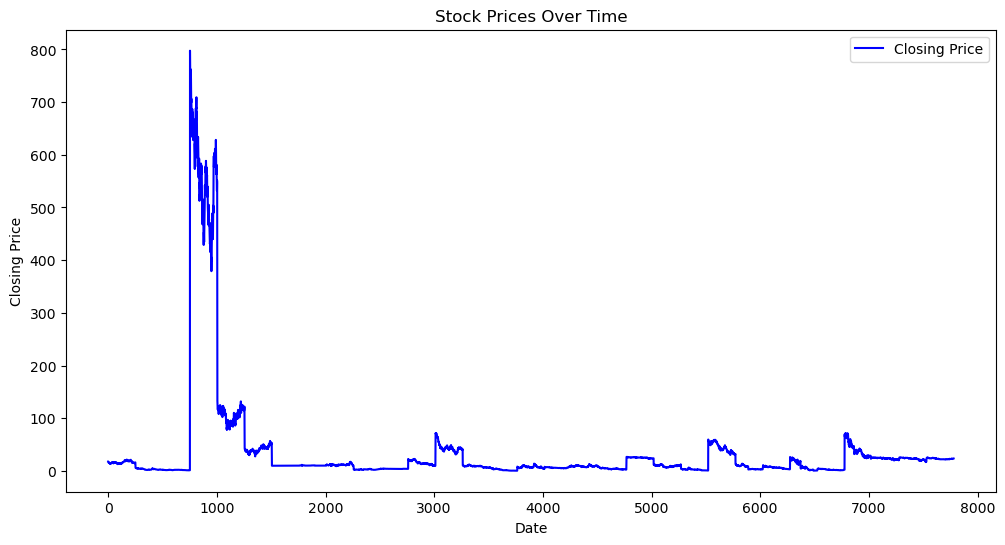

In [16]:
# Plotting stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(df_new['close'], label='Closing Price', color='blue')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

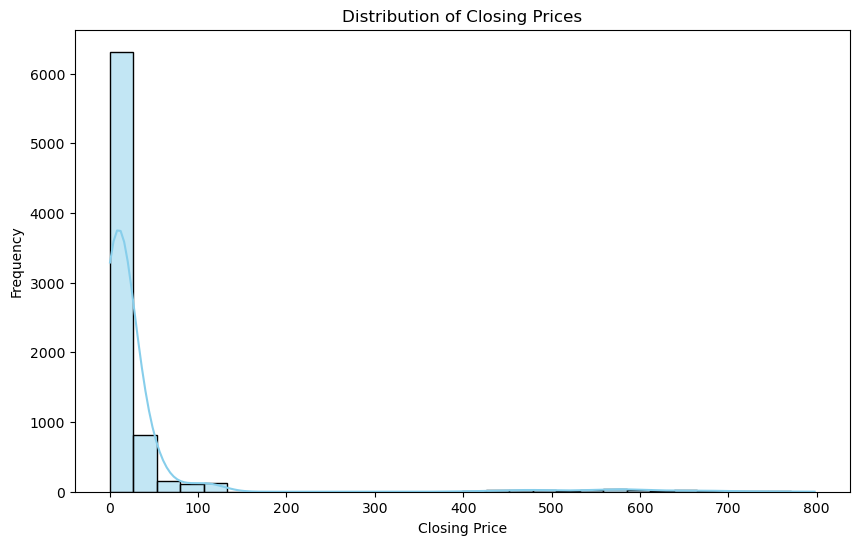

In [17]:
# Plotting distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(df_new['close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

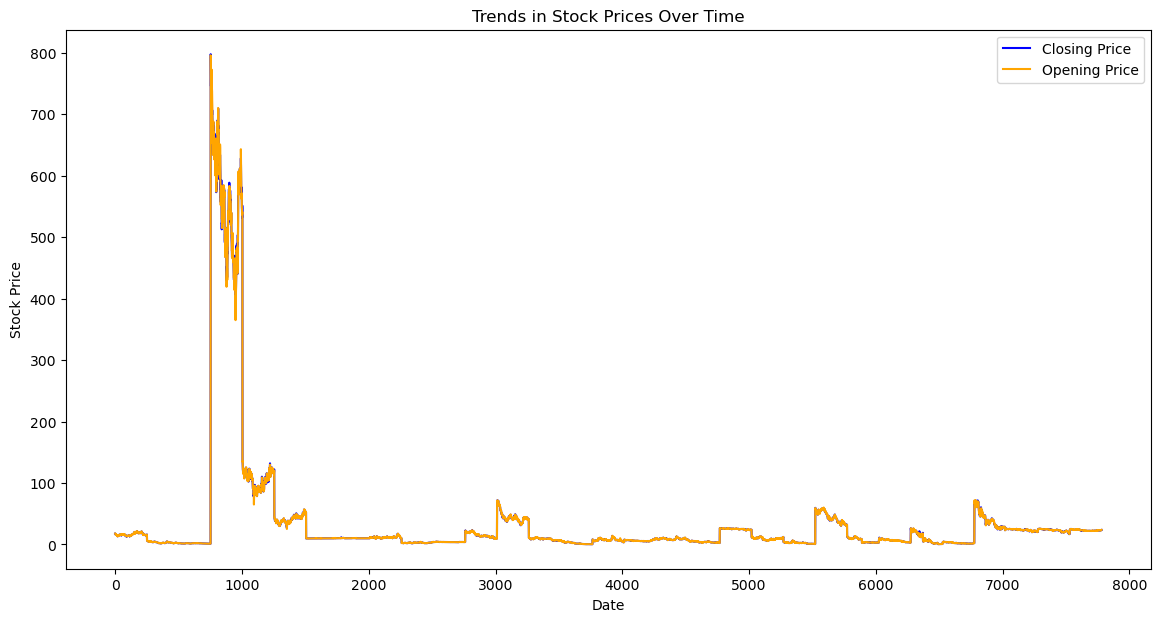

In [18]:
# Plotting trends in stock prices
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_new.index, y=df_new['close'], label='Closing Price', color='blue')
sns.lineplot(x=df_new.index, y=df_new['open'], label='Opening Price', color='orange')
plt.title('Trends in Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

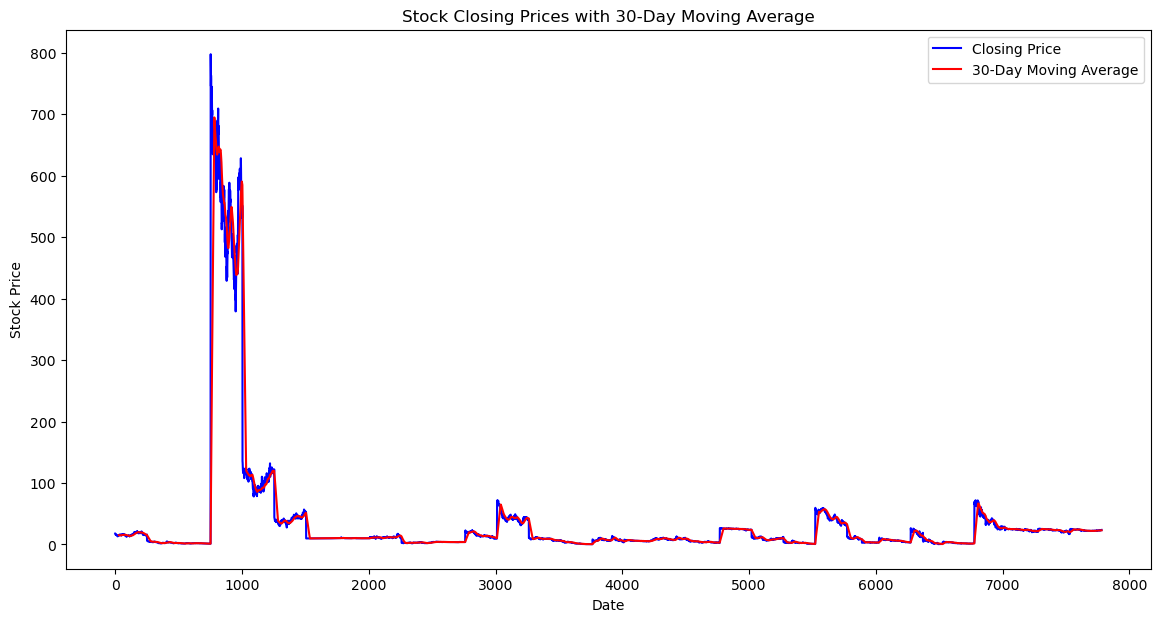

In [19]:
# Plotting rolling mean (moving average) to smooth out fluctuations
plt.figure(figsize=(14, 7))
df_new['close'].plot(label='Closing Price', color='blue')
df_new['close'].rolling(window=30).mean().plot(label='30-Day Moving Average', color='red')
plt.title('Stock Closing Prices with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [20]:
df_new

,date,open,high,low,close
0,2022-01-03,17.799999,18.219000,17.500000,17.760000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000
2,2022-01-05,17.580000,17.799999,16.910000,16.950001
3,2022-01-06,16.650000,16.879999,16.139999,16.170000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000
...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001


# Predictive Modelling - Regression

In [21]:
# Feature Engineering
# Assuming 'date' is in datetime format
df_new['Day_of_Week'] = df_new['date'].dt.dayofweek
df_new['Month'] = df_new['date'].dt.month

In [22]:
df_new

,date,open,high,low,close,Day_of_Week,Month
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,0,1
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,1,1
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,2,1
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,3,1
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,4,1
...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,4,12
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,1,12
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,2,12
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,3,12


In [23]:
# Regression Models
X = df_new[['Day_of_Week', 'Month', 'open', 'high', 'low']]
y = df_new[['close']]

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5446, 5), (2335, 5), (5446, 1), (2335, 1))

In [26]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
y_pred = model_rf.predict(X_test)

In [28]:
model_rf.score(X_train, y_train)

0.9999573912798683

In [29]:
model_rf.score(X_test, y_test)

0.9997122086695884

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.43130190069072155
MSE: 2.6559188507639466
RMSE: 1.6296990061860952


In [32]:
y_test = y_test.values.ravel()

In [33]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
0,2.960000,2.89730
1,8.930000,9.07860
2,13.250000,13.19930
3,20.820000,20.95520
4,3.390000,3.35975
...,...,...
2330,475.380005,476.81581
2331,45.560001,45.46680
2332,45.330002,46.69730
2333,25.230000,25.26202


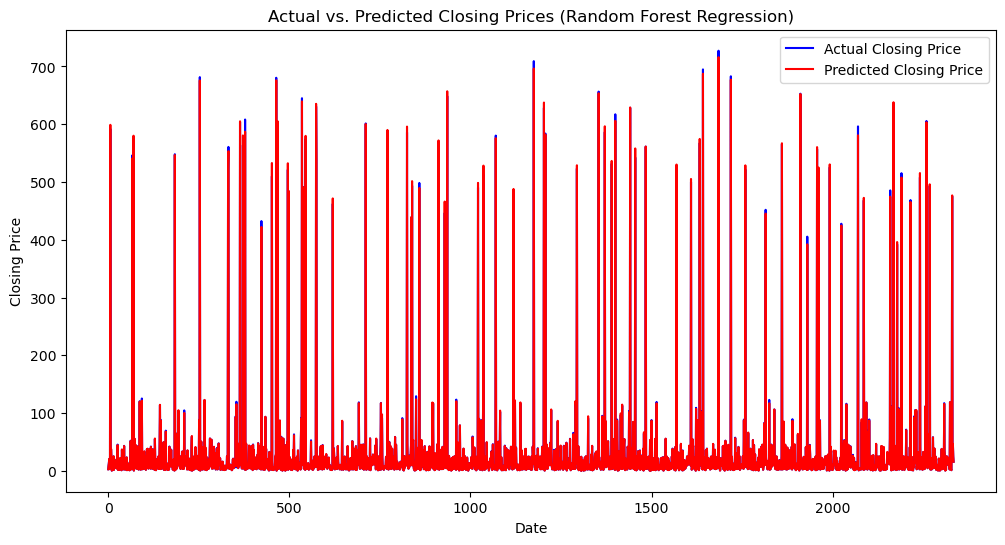

In [45]:
# Visualize actual vs. predicted prices
y_test_df=pd.DataFrame(y_test)
y_pred_df=pd.DataFrame(y_pred)
plt.figure(figsize=(12, 6))
plt.plot(y_test_df.index, y_test, label='Actual Closing Price', color='blue')
plt.plot(y_pred_df.index, y_pred, label='Predicted Closing Price', color='red')
plt.title('Actual vs. Predicted Closing Prices (Random Forest Regression)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

**Documentation for Stock Market Prediction Project**

### Approach and Methodologies:

#### Exploratory Data Analysis (EDA):

1. **Data Loading and Inspection:**
   - Used the opendatasets library to load dataset directly from kaggle
   - Loaded the stock market dataset using Pandas.
   - Checked for the presence of missing values and data types.

3. **Data Cleaning:**
   - Handled missing values and converted data types if necessary
   - Ensured data integrity and consistency.

4. **Exploration and Visualization:**
   - Explored the distribution of key variables (open, high, low, close).
   - Visualized trends over time using line plots and candlestick charts.
   - Calculated and visualized summary statistics.
   - Investigated the correlation matrix to understand relationships between variables.

#### Predictive Modeling:

1. **Feature Engineering:**
   - Selected relevant features for predicting stock prices (open, high, low).
   - Considered additional features based on domain knowledge.

2. **Train-Test Split:**
   - Split the dataset into training and testing sets, ensuring a reasonable time range for training.

3. **Regression Model:**
   - Implemented Random Forest Regression model.
   - Chose these models due to their simplicity and effectiveness in capturing linear and non-linear relationships.

4. **Evaluation:**
   - Evaluated the model using Mean Squared Error (MSE) as a performance metric.
   - Considered the trade-offs between model complexity and performance.

### Insights Gained:

1. **Trends in Stock Prices:**
   - Identified trends and patterns in stock prices over time.
   - Observed relationships between opening, closing, high, low prices, and trading volume.

2. **Statistical Summary:**
   - Gained insights into the statistical distribution of stock prices.
   - Detected outliers and anomalies that might impact predictions.

3. **Correlation Analysis:**
   - Analyzed the correlation matrix to understand the relationships between features.
   - Identified potential multicollinearity among variables.

### Chosen Predictive Model:

1. **Random Forest Regression:**
   - Opted for Random Forest Regression for its ability to handle non-linear relationships and capture complex patterns.
   - Robust to outliers and less prone to overfitting.

### Model Evaluation:

1. **Performance Metrics:**
   - Used Mean Squared Error (MSE) to quantify the accuracy of predictions.
   - Evaluated both Linear Regression and Random Forest Regression models.

2. **Visualizations:**
   - Visualized actual vs. predicted stock prices to assess model performance visually.
   - Plotted additional visualizations to aid in understanding model behavior.

### Challenges and Limitations:

1. **Data Challenges:**
   - Addressed missing values and data inconsistencies.
   - Dealt with potential outliers that might affect model performance.

2. **Model Limitations:**
   - Acknowledged the limitations of linear models in capturing complex relationships.
   - Considered the need for more sophisticated time series models for improved forecasting.

### Conclusion:

In conclusion, this project aimed to analyze and predict stock prices using a combination of exploratory data analysis and regression models. Insights gained from EDA provided a foundational understanding of the dataset, while the predictive models offered an initial attempt at forecasting stock prices. Moving forward, more advanced models and feature engineering techniques could be explored for enhanced predictive capabilities.